<a href="https://colab.research.google.com/github/FGalvao77/Deep-Neural-Multilayer-Perceptron-MLP-com-Scikit-learn/blob/main/Deep_Neural_Multilayer_Perceptron_(MLP)_com_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Neural Multilayer Perceptron (MLP) com Scikit-learn**

---


``MLP`` é um tipo de rede neural artificial (**ANN**).<br>

_O MLP mais simples consiste em pelo menos três camadas de nós: uma camada de entrada, uma camada oculta e uma camada de saída._

No mundo do aprendizado profundo (deep learning), ``TensorFlow``, ``Keras``, ``Microsoft Cognitive Toolkit (CNTK)`` e`` PyTorch`` são muito populares. 

A maioria de nós pode não perceber que a biblioteca muito popular de aprendizado de máquina, o **Scikit-learn** também é capaz de uma modelagem básica de aprendizado profundo. 

Neste artigo, discutiremos os domínios da viabilidade da modelagem de aprendizado profundo no Scikit-learn e as suas limitações. Além disso, discutiremos a implementação prática com dois exemplos.

Pontos salientes do **Multilayer Perceptron (MLP**) no _Scikit-learn_: 
- não há função de ativação na camada de saída.

Para cenários de regressão, o erro quadrado é a função de perda e, a entropia cruzada é a função de perda para a classificação.

Ele pode funcionar com regressão de valores alvo simples ou múltiplos.
Ao contrário de outros pacotes populares, como Keras, a implementação de MLP no Scikit não oferece suporte a GPU. Não podemos ajustar os parâmetros como diferentes funções de ativação, inicializadores de peso, etc. para cada camada.

### **Exemplo de regressão**

---

Nesse exemplo de regressão, utilizaremos um conjunto de dados de casas da Califórnia (`fetch_california_housing`) e, onde nossa rede tentará prever o valor de venda de cada casa dadas alguns atributos próprio do imóvel.



- **Etapa 1:** No pacote Scikit-Learn, MLPRegressor é implementado no módulo ``neural_network``. Importaremos os outros módulos como “train_test_split” para dividir o conjunto de dados em treinamento e conjunto de treinamento para testar o modelo, “fetch_california_housing” para obter os dados e “StandardScaler” para dimensionar os dados, já que diferentes recursos (variáveis ​​independentes) têm grande valor escala de alcance. É muito importante dimensionar os dados usados ​​para treinar o modelo.

Você pode aprender mais sobre os diferentes escaladores no artigo Escalonamento de recursos - efeito de diferentes escaladores Scikit-Learn: mergulho profundo.

In [ ]:
# importando as bibliotecas
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

- **Etapa 2:** dividiremos o conjunto de dados em conjunto de dados de treinamento e teste. Reservamos 20% do conjunto de dados para verificar a precisão do modelo treinado. 

Os conjuntos de dados de treino e teste são dimensionados posteriormente para garantir que os dados de entrada sejam normalmente distribuídos de forma padrão, centralizados em torno de zero e com variação na mesma ordem.

In [ ]:
# instanciando o conjunto de dados
cal_housing = fetch_california_housing()

In [ ]:
# visualizando informações gerais do dataset
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
# instaciando as variáveis independentes
X = pd.DataFrame(cal_housing.data, 
                 columns = cal_housing.feature_names)

# instancaindo a variável dependente
y = cal_housing.target

In [ ]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=1, 
                                                    test_size=0.2)

> - train_test_split
  - https://bit.ly/3i3G6CW

In [ ]:
# visualizando a quantidade de dados de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

- **Etapa 3:** escalamos os dados exatamente como no exemplo de regressão acima e pelo mesmo motivo.

In [ ]:
# instanciando o algoritmo para escalamos os dados de treino e teste
std_sc = StandardScaler()

> - StandardScaler
    - https://bit.ly/3kCNvLl

In [ ]:
# aplicando o escalamento dos dado com nosso objeto definido
X_train_scaled = std_sc.fit_transform(X_train)
X_test_scaled = std_sc.transform(X_test)

- **Etapa 4:** No código abaixo, três camadas ocultas são modeladas, com 64 neurônios em cada camada. Considerando a camada de entrada e saída, temos um total de 5 camadas no modelo. No caso de qualquer otimizador não ser mencionado, então “Adam” é o otimizador padrão e pode gerenciar um conjunto de dados muito grande.

In [ ]:
# instanciando o modelo de regressão e aplicando o treinamento do modelo
model_reg = MLPRegressor(hidden_layer_sizes=(64,64,64), 
                         activation='relu', 
                         random_state=1, 
                         max_iter=2000).fit(X_train_scaled, y_train)

> Além da ativação “RELU”, o MLPRegressor suporta a função “sigmoid” e “hyperbolic tan”.<br>
- MLPRegressor
  - https://bit.ly/2XNBsSZ


- **Etapa 5:** no código a seguir, o modelo treinado é usado para prever os valores de destino do conjunto de dados de teste reservado, que o modelo não viu antes.

In [ ]:
# realizando as predições
y_pred = model_reg.predict(X_test_scaled)

print('Score:', (r2_score(y_pred, y_test)))

Score: 0.7633133194206162


Vimos um exemplo de regressão. A seguir, veremos exemplo de classificação. 

No Scikit-learn, “MLPClassifier” está disponível para cenários de classificação Multilayer Perceptron (MLP).

### **Exemplo de classificação**

---
Nesse exemplo para classificação utilizaremos três conjuntos de dados:
- `load_iris`
  - classificação de multiclasses.
    - o tipo de espécie da flor: Iris-Setosa, Iris-Versicolor e Iris-Virginica.<br><br>
- `load_digits`
  - classificação de multiclasses.
    - o número presente na imagem: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.<br><br>
- `load_breast_cancer`
  - classificação binária (duas classes).
    - se o câncer é malgino ou benigno.



#### **load_iris**

- **Passo 1:** Como sempre primeiro iremos importar os módulos que usaremos no exemplo. Usaremos o banco de dados Iris e o MLPClassifierfrom para o exemplo de classificação.

In [ ]:
# importando as bibliotecas
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

- **Etapa 2:** Iremos instanciar o conjunto de dados e, para em seguida separar o as variáveis independentes, nesse caso iremos chamar de “X” e, a variável dependentes, “y”.

In [ ]:
# instanciando o conjunto de dados
iris_data = load_iris()

# visualizando informações gerais do dataset
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# instancaindo as variáveis independentes e a dependente
X = pd.DataFrame(iris_data.data, 
                 columns=iris_data.feature_names)

y = iris_data.target

In [ ]:
# visualizando a(s) dimensão (es) dos objetos
X.shape, y.shape 

((150, 4), (150,))

- **Etapa 3:** Semelhante ao exemplo de regressão, dividiremos o conjunto de dados em conjunto de dados de treinamento e teste. Reservando 20% do conjunto de dados para verificar a precisão do modelo treinado. 

Os conjunto de dados de treino e teste são dimensionados posteriormente para garantir que os dados de entrada sejam normalmente distribuídos de forma padrão, centralizados em torno de zero e com variação na mesma ordem.

In [ ]:
# separando os dados em treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.2)

In [ ]:
# instanciando o algoritmo para realizar o escalamento dos dados
std_sc = StandardScaler()

# aplicando o escalemento nos dados de X - treino e teste
X_train_scaled = std_sc.fit_transform(X_train)
X_test_scaled = std_sc.transform(X_test)

- **Etapa 4:** no código a seguir, modelamos quatro camadas ocultas com diferentes neurônios em cada camada. Considerando a camada de entrada e saída, temos um total de 6 camadas no modelo. Caso algum otimizador não seja mencionado, “Adam” é o otimizador padrão.

In [ ]:
# instanciando o classificador
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), 
                    activation='relu', 
                    random_state=1).fit(X_train_scaled, y_train)

> - MLPClassifier
    - https://bit.ly/3EQ1LbO

In [ ]:
# realizando as predições
y_pred = clf.predict(X_test_scaled)

# visualizando o score
clf.score(X_test_scaled, y_test)

0.9666666666666667

O classificador mostra uma pontuação bastante alta para os dados de teste. É importante compreender as áreas nas quais o modelo de classificação está cometendo um erro para ter uma noção completa da precisão do modelo.

Você pode ler mais sobre o motivo pelo qual devemos usar a matriz de confusão para julgar a precisão do modelo de classificação em “Visualização de precisão: Algoritmos de classificação de aprendizado de máquina supervisionado”.

- **Passo 5:** Iremos imprimir o relatório das métricas e em seguida plotar uma matriz de confusão para entender as classificações que são feitas incorretas pelo modelo.

In [ ]:
from sklearn.metrics import classification_report

# avaliando a rede neural
print('\t\t[INFO] avaliando a rede neural\n')
predictions = clf.predict(X_test_scaled)

print(classification_report(y_test, 
                            predictions))

		[INFO] avaliando a rede neural

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



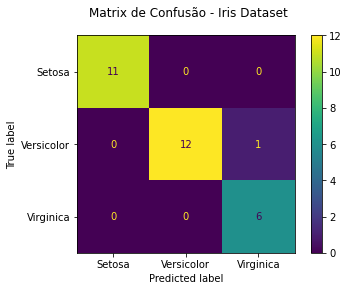

In [ ]:
# plotando a matriz de confusão
fig = plot_confusion_matrix(clf, X_test_scaled, y_test, 
                            display_labels=['Setosa', 'Versicolor', 'Virginica'])

fig.figure_.suptitle('Matrix de Confusão - Iris Dataset')
plt.show();

> Parece que apenas uma espécie “Versicolor” é identificada incorretamente como “Virginica” e o resto pelo modelo.

Conclusão: podemos fazer regressão de aprendizagem profunda simples e modelo de classificação no Scikit-learn. Na minha opinião, não é adequado para qualquer modelagem em grande escala da vida real, pois não há suporte para GPU e opções muito limitadas para ajustar os parâmetros.

Você pode aprender mais sobre a técnica de visualização de aprendizado profundo no artigo Visualização de precisão em aprendizado profundo.

#### **load_digits**

In [ ]:
# importando as bibliotecas
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# instanciando o conjunto de dados
digits_data = load_digits()

# visualizando informações gerais do dataset
print(digits_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# instancaindo as variáveis independentes e a dependente
X = pd.DataFrame(digits_data.data)
y = digits_data.target

In [ ]:
# visualizando a(s) dimensão (es) dos objetos
X.shape, y.shape 

((1797, 64), (1797,))

In [ ]:
# separando os dados em treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.2)

In [ ]:
# instanciando o algoritmo para realizar o escalamento dos dados
std_sc = StandardScaler()

# aplicando o escalemento nos dados de X - treino e teste
X_train_scaled = std_sc.fit_transform(X_train)
X_test_scaled = std_sc.transform(X_test)

In [ ]:
# instanciando o classificador
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32,10), 
                    activation='relu', 
                    random_state=1).fit(X_train_scaled, y_train)

In [ ]:
# realizando as predições
y_pred = clf.predict(X_test_scaled)

# visualizando o score
clf.score(X_test_scaled, y_test)

0.9722222222222222

In [ ]:
from sklearn.metrics import classification_report

# avaliando a rede neural
print('\t\t[INFO] avaliando a rede neural\n')
predictions = clf.predict(X_test_scaled)

print(classification_report(y_test, 
                            predictions))

		[INFO] avaliando a rede neural

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      0.97      0.99        35
           2       1.00      0.94      0.97        36
           3       0.93      1.00      0.96        41
           4       0.97      1.00      0.99        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.97      0.97        37
           8       0.96      0.90      0.93        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



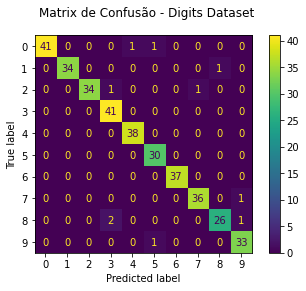

In [ ]:
# plotando a matriz de confusão
fig = plot_confusion_matrix(clf, X_test_scaled, y_test, 
                            display_labels=['0', '1', '2', '3', '4',
                                            '5', '6', '7', '8', '9'])

fig.figure_.suptitle('Matrix de Confusão - Digits Dataset')
plt.show();

#### **load_breast_cancer**

In [ ]:
# importando as bibliotecas
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# instanciando o conjunto de dados
cancer_data = load_breast_cancer()

# visualizando informações gerais do dataset
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# instancaindo as variáveis independentes e a dependente
X = pd.DataFrame(cancer_data.data, 
                 columns=cancer_data.feature_names)
# X = pd.DataFrame(cancer_data.data)

y = cancer_data.target

In [ ]:
# visualizando a(s) dimensão (es) dos objetos
X.shape, y.shape

((569, 30), (569,))

In [ ]:
# separando os dados em treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=1, 
                                                    test_size=0.2)

In [ ]:
# instanciando o algoritmo para realizar o escalamento dos dados
std_sc = StandardScaler()

# aplicando o escalemento nos dados de X - treino e teste
X_train_scaled = std_sc.fit_transform(X_train)
X_test_scaled = std_sc.transform(X_test)

In [ ]:
# instanciando o classificador
clf = MLPClassifier(hidden_layer_sizes=(128,64,32,2), 
                    activation='relu', 
                    random_state=1).fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# realizando as predições
y_pred = clf.predict(X_test_scaled)

# visualizando o score
clf.score(X_test_scaled, y_test)

0.9649122807017544

In [ ]:
from sklearn.metrics import classification_report

# avaliando a rede neural
print('\t\t[INFO] avaliando a rede neural\n')
predictions = clf.predict(X_test_scaled)

print(classification_report(y_test, 
                            predictions))

		[INFO] avaliando a rede neural

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



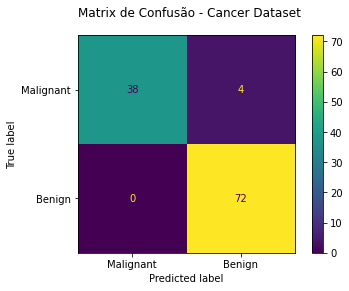

In [ ]:
# plotando a matriz de confusão
fig = plot_confusion_matrix(clf, X_test_scaled, y_test, 
                            display_labels=['Malignant', 'Benign'])

fig.figure_.suptitle('Matrix de Confusão - Cancer Dataset')
plt.show();

#### **Material extra:**

---

- Perceptron multicamadas
  - https://bit.ly/3lVtRtt
- Capítulo 10 – As 10 Principais Arquiteturas de Redes Neurais
  - https://bit.ly/39zaUXL
- Redes Neurais Profundas - Deep Learning
Aula 2 - Redes Neurais Perceptron Multicamadas
  - https://bit.ly/3AItnNt
- Rede Neural Perceptron Multicamadas
  - https://bit.ly/3ucnVAa
- Redes Neurais, Perceptron Multicamadas e o Algoritmo Backpropagation
  - https://bit.ly/2W7G1qb
- Diferentes abordagens para o aprendizado da rede neural artificial multilayer perceptron.
  - https://bit.ly/3AGa0Vd